In [ ]:
!pip install DataSynthesizer

In [ ]:
from DataSynthesizer.DataDescriber import DataDescriber
from DataSynthesizer.DataGenerator import DataGenerator
from DataSynthesizer.ModelInspector import ModelInspector
from DataSynthesizer.lib.utils import normalize_given_distribution, read_json_file, pairwise_attributes_mutual_information, mutual_information, set_random_seed

from IPython.display import clear_output
from scipy.stats import entropy, ks_2samp
from scipy.spatial.distance import euclidean
from sklearn.metrics import mutual_info_score
from random import randint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Start with a real dataset __hw_compas__ and a fake dataset __hw_xyz__. Generate synthetic datasets of size __N=10000__, in the following four categories:
- A:  random mode
- B: independent attribute mode with __epsilon = 0.1__
- C:  correlated attribute mode with __epsilon = 0.1__, Bayes net degree k=1
- D: correlated attribute mode with __epsilon = 0.1__, Bayes net degree k=2

In [ ]:
# Packages for reading csv file into Colaboratory:
!pip install -U -q PyDrive==1.3.1

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client. 
# Please follow the steps as instructed when you run the following commands. 

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
fileid_compas = '12nKVg66nQkHX9gLFL-wXpgppCNSoasFJ'    
real_data_file = 'hw_compas.csv'

fileid_fake = '125JShDZAur7zQSugMoLi-JiIohtcvGY1'    
fake_data_file = 'hw_fake.csv'

downloaded = drive.CreateFile({'id':fileid_compas}) 
downloaded.GetContentFile(real_data_file)  
df_real = pd.read_csv(real_data_file)

downloaded = drive.CreateFile({'id':fileid_fake}) 
downloaded.GetContentFile(fake_data_file)  
df_fake = pd.read_csv(fake_data_file)

In [ ]:
# Instantiate data generator & describer
describer = DataDescriber()
generator = DataGenerator()

# Set random seed
set_random_seed(seed=10)

# Set synthetic dataset size
n = 10000

In [ ]:
## Generate synthetic datasets based on COMPAS dataset

# Set file paths for COMPAS files
compas_description_files = {'random mode':            'compas_description(random).json', 
                            'independent mode':       'compas_description(independent).json', 
                            'correlated mode (k=1)':  'compas_description(correlated_k1).json',
                            'correlated mode (k=2)':  'compas_description(correlated_k2).json'}
compas_synthetic_data_files = {'random mode':             'compas_synthetic_data(random).csv', 
                               'independent mode':        'compas_synthetic_data(independent).csv', 
                               'correlated mode (k=1)':   'compas_synthetic_data(correlated_k1).csv',
                               'correlated mode (k=2)':   'compas_synthetic_data(correlated_k2).csv'}

# Random mode
describer.describe_dataset_in_random_mode(real_data_file, seed=0)
describer.save_dataset_description_to_file(compas_description_files['random mode'])

generator.generate_dataset_in_random_mode(n=n, description_file=compas_description_files['random mode'], seed=0, 
                                          minimum=0, maximum=100)
generator.save_synthetic_data(compas_synthetic_data_files['random mode'])
compas_random = pd.read_csv(compas_synthetic_data_files['random mode'])

# Independent attribute mode w/ eps=0.1
describer.describe_dataset_in_independent_attribute_mode(real_data_file, epsilon=0.1, seed=0)
describer.save_dataset_description_to_file(compas_description_files['independent mode'])

generator.generate_dataset_in_independent_mode(n=n, description_file=compas_description_files['independent mode'], seed=0)
generator.save_synthetic_data(compas_synthetic_data_files['independent mode'])
compas_independent = pd.read_csv(compas_synthetic_data_files['independent mode'])

# Correlated attribute mode w/ eps=0.1, k=1
describer.describe_dataset_in_correlated_attribute_mode(real_data_file, epsilon=0.1, k=1, seed=0)
describer.save_dataset_description_to_file(compas_description_files['correlated mode (k=1)'])

generator.generate_dataset_in_correlated_attribute_mode(n=n, description_file=compas_description_files['correlated mode (k=1)'], seed=0)
generator.save_synthetic_data(compas_synthetic_data_files['correlated mode (k=1)'])
compas_correlated_k1 = pd.read_csv(compas_synthetic_data_files['correlated mode (k=1)'])

# Correlated attribute mode w/ eps=0.1, k=2
describer.describe_dataset_in_correlated_attribute_mode(real_data_file, epsilon=0.1, k=2, seed=0)
describer.save_dataset_description_to_file(compas_description_files['correlated mode (k=2)'])

generator.generate_dataset_in_correlated_attribute_mode(n=n, description_file=compas_description_files['correlated mode (k=2)'], seed=0)
generator.save_synthetic_data(compas_synthetic_data_files['correlated mode (k=2)'])
compas_correlated_k2 = pd.read_csv(compas_synthetic_data_files['correlated mode (k=2)'])

# Save Bayesian network for k=2
correlated_k2_bn = describer.bayesian_network

## Generate synthetic datasets based on fake dataset

# Set file paths for fake files
fake_description_files = {'random mode':            'fake_description(random).json', 
                          'independent mode':       'fake_description(independent).json', 
                          'correlated mode (k=1)':  'fake_description(correlated_k1).json',
                          'correlated mode (k=2)':  'fake_description(correlated_k2).json'}
fake_synthetic_data_files = {'random mode':             'fake_synthetic_data(random).csv', 
                             'independent mode':        'fake_synthetic_data(independent).csv', 
                             'correlated mode (k=1)':   'fake_synthetic_data(correlated_k1).csv',
                             'correlated mode (k=2)':   'fake_synthetic_data(correlated_k2).csv'}

# Random mode
describer.describe_dataset_in_random_mode(fake_data_file, seed=0)
describer.save_dataset_description_to_file(fake_description_files['random mode'])

generator.generate_dataset_in_random_mode(n=n, description_file=fake_description_files['random mode'], seed=0,
                                          minimum=0, maximum=100)
generator.save_synthetic_data(fake_synthetic_data_files['random mode'])
fake_random = pd.read_csv(fake_synthetic_data_files['random mode'])

# Independent attribute mode w/ eps=0.1
describer.describe_dataset_in_independent_attribute_mode(fake_data_file, epsilon=0.1, seed=0)
describer.save_dataset_description_to_file(fake_description_files['independent mode'])

generator.generate_dataset_in_independent_mode(n=n, description_file=fake_description_files['independent mode'], seed=0)
generator.save_synthetic_data(fake_synthetic_data_files['independent mode'])
fake_independent = pd.read_csv(fake_synthetic_data_files['independent mode'])

# Correlated attribute mode w/ eps=0.1, k=1
describer.describe_dataset_in_correlated_attribute_mode(fake_data_file, epsilon=0.1, k=1, seed=0)
describer.save_dataset_description_to_file(fake_description_files['correlated mode (k=1)'])

generator.generate_dataset_in_correlated_attribute_mode(n=n, description_file=fake_description_files['correlated mode (k=1)'], seed=0)
generator.save_synthetic_data(fake_synthetic_data_files['correlated mode (k=1)'])
fake_correlated_k1 = pd.read_csv(fake_synthetic_data_files['correlated mode (k=1)'])

# Correlated attribute mode w/ eps=0.1, k=2
describer.describe_dataset_in_correlated_attribute_mode(fake_data_file, epsilon=0.1, k=2, seed=0)
describer.save_dataset_description_to_file(fake_description_files['correlated mode (k=2)'])

generator.generate_dataset_in_correlated_attribute_mode(n=n, description_file=fake_description_files['correlated mode (k=2)'], seed=0)
generator.save_synthetic_data(fake_synthetic_data_files['correlated mode (k=2)'])
fake_correlated_k2 = pd.read_csv(fake_synthetic_data_files['correlated mode (k=2)'])

================ Constructing Bayesian Network (BN) ================
Adding ROOT score
Adding attribute age
Adding attribute sex
Adding attribute race
========================== BN constructed ==========================
================ Constructing Bayesian Network (BN) ================
Adding ROOT score
Adding attribute age
Adding attribute sex
Adding attribute race
========================== BN constructed ==========================
================ Constructing Bayesian Network (BN) ================
Adding ROOT child_2
Adding attribute parent_2
Adding attribute child_1
Adding attribute parent_1
========================== BN constructed ==========================
================ Constructing Bayesian Network (BN) ================
Adding ROOT child_2
Adding attribute parent_2
Adding attribute child_1
Adding attribute parent_1
========================== BN constructed ==========================


## Part (a)

### Q1

Median, Mean, Min, Max of __age__ for each setting A, B, C and D, compare to the ground truth value in __hw_compas__, present results in a table

In [ ]:
# Compute median, mean, min, & max of age for each dataset
print("Comparison of real dataset statistics vs. synthetic dataset statistics:\n")
print("{blank: <33} {med: ^10} {mean: ^10} {min: ^10} {max: ^10}".format(blank="", med="Median", mean="Mean", min="Min", max="Max"))

# Define labels and datasets to print
dfs = {"Ground Truth": df_real, "Random Mode": compas_random, "Independent Attribute Mode": compas_independent,
       "Correlated Attribute Mode (k=1)": compas_correlated_k1, "Correlated Attribute Mode (k=2)": compas_correlated_k2}

# Print statistics
for label, df in dfs.items():
  print("{label: <33} {med: ^10} {mean: ^10} {min: ^10} {max: ^10}".format(label=label, med="{:.1f}".format(df['age'].median()), mean="{:.4f}".format(df['age'].mean()), 
                                                                           min="{:.1f}".format(df['age'].min()), max="{:.1f}".format(df['age'].max())))

Comparison of real dataset statistics vs. synthetic dataset statistics:

                                    Median      Mean       Min        Max    
Ground Truth                         32.0     35.1433      18.0       96.0   
Random Mode                          50.0     50.3008      0.0       100.0   
Independent Attribute Mode           32.0     36.8834      18.0       96.0   
Correlated Attribute Mode (k=1)      38.0     45.2641      18.0       96.0   
Correlated Attribute Mode (k=2)      40.0     45.5815      18.0       96.0   


### Q2

Plot the distributions of values of age and sex attributes in hw_compas and in synthetic datasets generated under settings A and B. 
Some more sophisticated statistical measure that’s good for independent attribute mode - __Two-sample Kolmogorov–Smirnov test__ and __KL-divergence__. Also show the difference visually, comparing real vs. synthetic

In [ ]:
# Define function to plot distributions of age and sex
def plot_age_and_sex(dataset, suptitle):
  """Plot age and sex for the given dataset; decorate plots with given suptitle"""

  # Create subplots
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), constrained_layout=True)
  fig.suptitle(suptitle, fontsize=18)

  # Plot age
  sns.histplot(data=dataset, x='age', bins=30, ax=ax[0])
  ax[0].set_title('Age')
  ax[0].set_xlabel('Age')
  ax[0].set_xlim((0, 100))

  # Plot sex
  sns.histplot(data=dataset, x='sex', color='darkseagreen' ,ax=ax[1])
  ax[1].set_title('Sex')
  ax[1].set_xlabel('Sex')

  plt.show()

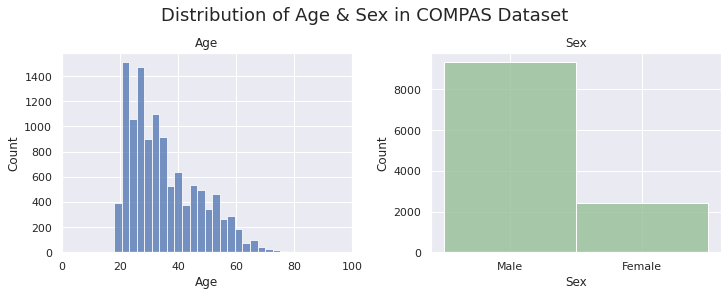

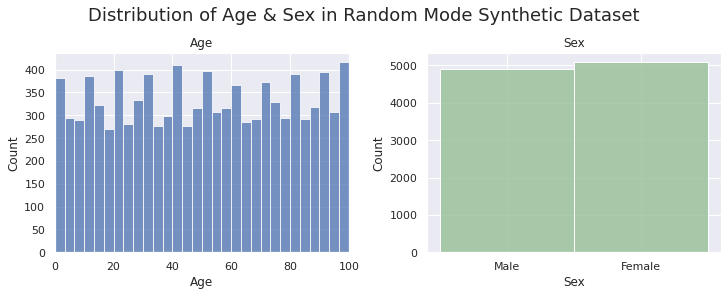

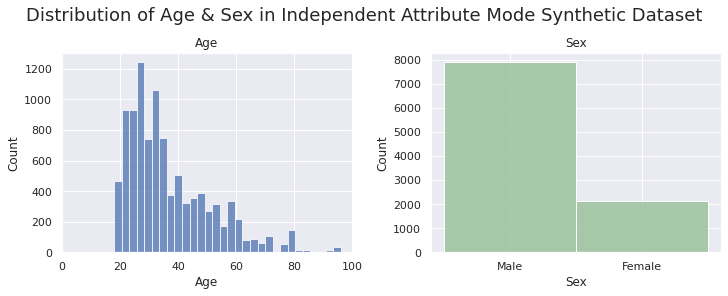

In [ ]:
# Plot age and sex for the real dataset, the random mode dataset, and the independent attribute mode dataset
plot_age_and_sex(df_real, "Distribution of Age & Sex in COMPAS Dataset")
plot_age_and_sex(compas_random, "Distribution of Age & Sex in Random Mode Synthetic Dataset")
plot_age_and_sex(compas_independent, "Distribution of Age & Sex in Independent Attribute Mode Synthetic Dataset")

#### Two-sample Kolmogorov–Smirnov test for continous attributes

In [ ]:
def ks_test(df_in: pd.DataFrame, df_out: pd.DataFrame, attr: str):
    """
    df_in: the sensitive dataset
    df_out: the synthetic dataset
    attr: the attribute that will be calculated for Two-sample Kolmogorov–Smirnov test.
    """
    return ks_2samp(df_in[attr], df_out[attr])[0]

#### KL-divergence for categorical attributes

In [ ]:
def get_distribution_of_categorical_attribute(attribute: pd.Series, indicies=None):
    distribution = attribute.dropna().value_counts()
    if indicies is not None:
        for idx in set(indicies) - set(distribution.index):
            distribution.loc[idx] = 0
    distribution.sort_index(inplace=True)
    return distribution/sum(distribution)

def kl_test(df_in: pd.DataFrame, df_out: pd.DataFrame, attr: str):
    """
    df_in: the sensitive dataset
    df_out: the synthetic dataset
    attr: the attribute that will be calculated for KL-divergence.
    """
    distribution_in = get_distribution_of_categorical_attribute(df_in[attr])
    distribution_out = get_distribution_of_categorical_attribute(df_out[attr], distribution_in.index)
    return entropy(distribution_out, distribution_in)

In [ ]:
# Compute Kolmogrov-Smirnov test for age
print("Kolmogrov-Smirnov test results:")
print("{label: <18} {value: ^10}".format(label="Real-Random", value="{:.5f}".format(ks_test(df_real, compas_random, 'age'))))
print("{label: <18} {value: ^10}".format(label="Real-Independent", value="{:.5f}".format(ks_test(df_real, compas_independent, 'age'))))

Kolmogrov-Smirnov test results:
Real-Random         0.37335  
Real-Independent    0.05305  


In [ ]:
# Compute Kullback-Leibler divergence for sex
print("KL Divergence results:")
print("{label: <18} {value: ^10}".format(label="Real-Random", value="{:.5f}".format(kl_test(df_real, compas_random, 'sex'))))
print("{label: <18} {value: ^10}".format(label="Real-Independent", value="{:.5f}".format(kl_test(df_real, compas_independent, 'sex'))))

KL Divergence results:
Real-Random         0.22389  
Real-Independent    0.00008  


### Q3

Compare the accuracy of correlated attribute mode with k=1 (C) and with k=2 (D). Display the __pairwise mutual information matrix by heatmaps__, showing mutual information between all pairs of attributes, in hw_fake and in two synthetic datasets (generated under C and D).

In [ ]:
# Generate pairwise mutual information dataframes
pairwise_fake = pairwise_attributes_mutual_information(df_fake)
pairwise_fake_corr_k1 = pairwise_attributes_mutual_information(fake_correlated_k1)
pairwise_fake_corr_k2 = pairwise_attributes_mutual_information(fake_correlated_k2)

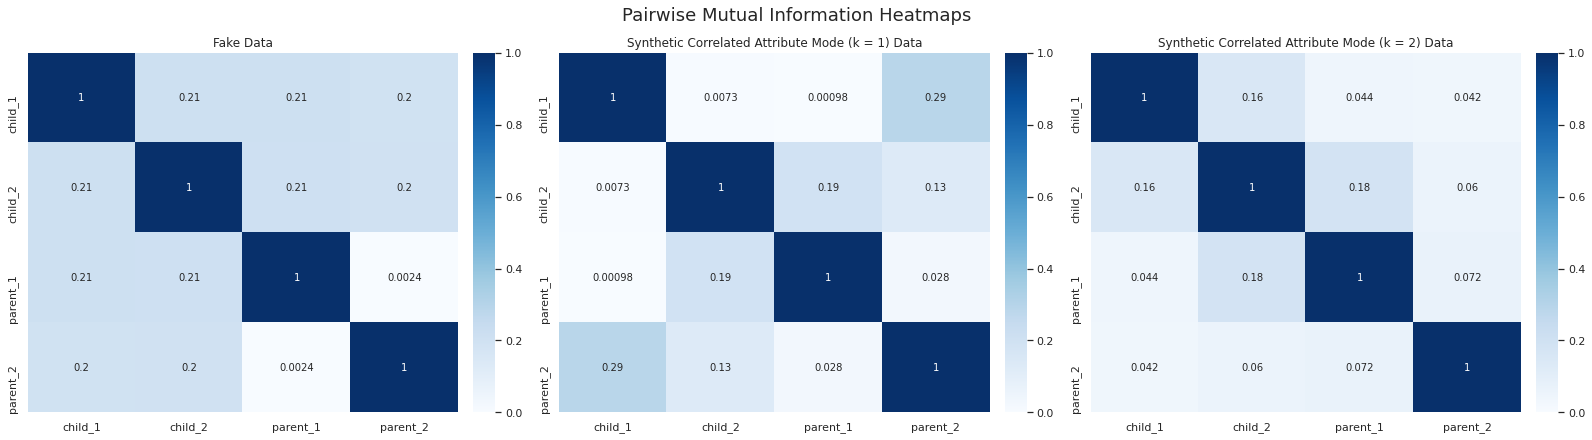

In [ ]:
# Plot mutual information heatmaps
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(22, 6), constrained_layout=True)
fig.suptitle("Pairwise Mutual Information Heatmaps", fontsize=18)

sns.heatmap(data=pairwise_fake, annot=True, cmap='Blues', cbar_kws={"aspect":60}, vmin=0, vmax=1, ax=ax[0])
ax[0].set_title("Fake Data")

sns.heatmap(data=pairwise_fake_corr_k1, annot=True, cmap='Blues', cbar_kws={"aspect":60}, vmin=0, vmax=1, ax=ax[1])
ax[1].set_title("Synthetic Correlated Attribute Mode (k = 1) Data")

sns.heatmap(data=pairwise_fake_corr_k2, annot=True, cmap='Blues', cbar_kws={"aspect":60}, vmin=0, vmax=1, ax=ax[2])
ax[2].set_title("Synthetic Correlated Attribute Mode (k = 2) Data")

plt.show()

In [ ]:
# Define function to print summary statistics of mutual information heatmaps
def print_mi_stats(mi_df, dataset_name):
  sum = 0
  count = 0
  for j in range(len(mi_df.columns)):
    for i in range(j):
      sum += mi_df.iloc[i, j]
      count = i + j + 1
  print("{} total: {:.4f}".format(dataset_name, sum))
  print("{} avg: {:.4f}".format(dataset_name, sum / count))

In [ ]:
print("Fake dataset mutual information summary statistics:\n")

# Print fake data MI stats
print_mi_stats(pairwise_fake, "Fake dataset")
print()

# Print correlated attribute mode (k=1) MI status
print_mi_stats(pairwise_fake_corr_k1, "Correlated attribute (k = 1) dataset")
print()

# Print correlated attribute mode (k=2) MI status
print_mi_stats(pairwise_fake_corr_k2, "Correlated attribute (k = 2) dataset")

Fake dataset mutual information summary statistics:

Fake dataset total: 1.0329
Fake dataset avg: 0.1721

Correlated attribute (k = 1) dataset total: 0.6504
Correlated attribute (k = 1) dataset avg: 0.1084

Correlated attribute (k = 2) dataset total: 0.5571
Correlated attribute (k = 2) dataset avg: 0.0929


## Part (b)

Study the variability in accuracy of answers to Q1 and Q2 for A, B and C: fix epsilon = 0.1, generate __10__ synthetic databases (by specifying different seeds).  Plot accuracy as a box-and-whiskers plot.  

In [ ]:
# Generate seeds
seeds = [i * i for i in range(10)]

In [ ]:
# Fix epsilon value
eps = 0.1

# Initialize lists to store values
random_values = {"median": [], "mean": [], "min": [], "max": []}
independent_values = {"median": [], "mean": [], "min": [], "max": []}
correlated_values = {"median": [], "mean": [], "min": [], "max": []}

for i in range(10):
  # Random mode
  describer.describe_dataset_in_random_mode(real_data_file, seed=seeds[i])
  describer.save_dataset_description_to_file(compas_description_files['random mode'])

  generator.generate_dataset_in_random_mode(n=n, description_file=compas_description_files['random mode'], seed=seeds[i])
  generator.save_synthetic_data(compas_synthetic_data_files['random mode'])
  random_df = pd.read_csv(compas_synthetic_data_files['random mode'])

  # Save random statistics
  random_values['median'].append(random_df['age'].median())
  random_values['mean'].append(random_df['age'].mean())
  random_values['min'].append(random_df['age'].min())
  random_values['max'].append(random_df['age'].max())

  # Independent attribute mode
  describer.describe_dataset_in_independent_attribute_mode(real_data_file, epsilon=eps, seed=seeds[i])
  describer.save_dataset_description_to_file(compas_description_files['independent mode'])

  generator.generate_dataset_in_independent_mode(n=n, description_file=compas_description_files['independent mode'], seed=seeds[i])
  generator.save_synthetic_data(compas_synthetic_data_files['independent mode'])
  independent_df = pd.read_csv(compas_synthetic_data_files['independent mode'])

  # Save random statistics
  independent_values['median'].append(independent_df['age'].median())
  independent_values['mean'].append(independent_df['age'].mean())
  independent_values['min'].append(independent_df['age'].min())
  independent_values['max'].append(independent_df['age'].max())

  # Correlated attribute mode
  describer.describe_dataset_in_correlated_attribute_mode(real_data_file, epsilon=eps, k=1, seed=seeds[i])
  describer.save_dataset_description_to_file(compas_description_files['correlated mode (k=1)'])

  generator.generate_dataset_in_correlated_attribute_mode(n=n, description_file=compas_description_files['correlated mode (k=1)'], seed=seeds[i])
  generator.save_synthetic_data(compas_synthetic_data_files['correlated mode (k=1)'])
  correlated_df = pd.read_csv(compas_synthetic_data_files['correlated mode (k=1)'])

  # Save correlated statistics
  correlated_values['median'].append(correlated_df['age'].median())
  correlated_values['mean'].append(correlated_df['age'].mean())
  correlated_values['min'].append(correlated_df['age'].min())
  correlated_values['max'].append(correlated_df['age'].max())

  # Clear output
  clear_output()

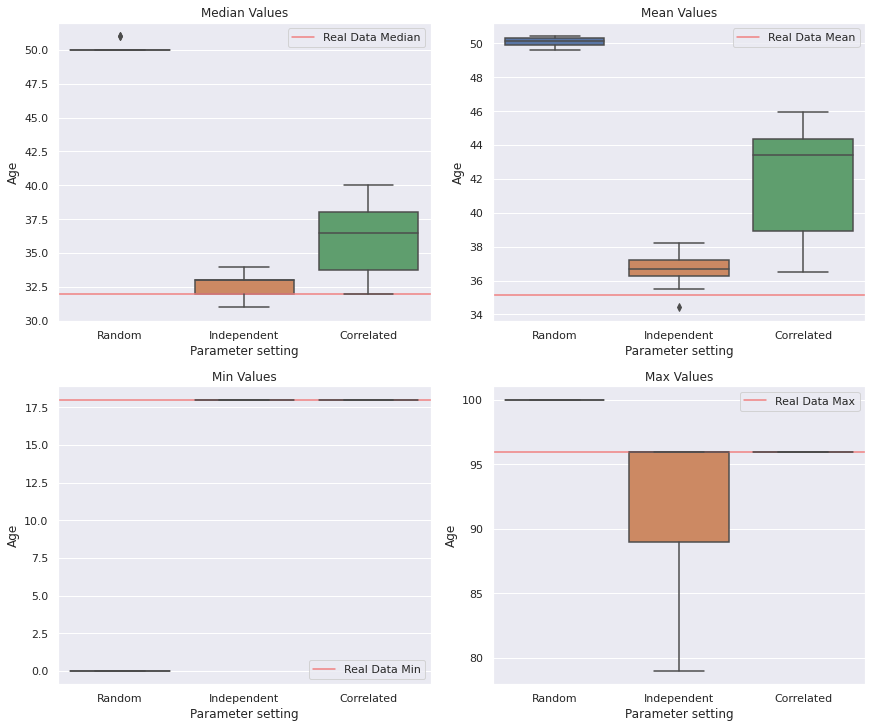

In [ ]:
# Re-organize lists for plotting
median_values = [random_values['median'], independent_values['median'], correlated_values['median']]
mean_values = [random_values['mean'], independent_values['mean'], correlated_values['mean']]
min_values = [random_values['min'], independent_values['min'], correlated_values['min']]
max_values = [random_values['max'], independent_values['max'], correlated_values['max']]

# Set x labels
x = ["Random", "Independent", "Correlated"]

# Create subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 10), constrained_layout=True)

# Plot median values
ax[0][0].axhline(df_real['age'].median(), color='lightcoral', label='Real Data Median')

sns.boxplot(data=median_values, ax=ax[0][0])
ax[0][0].set_title("Median Values")
ax[0][0].set_xticklabels(x)
ax[0][0].set_xlabel("Parameter setting")
ax[0][0].set_ylabel("Age")
ax[0][0].legend()

# Plot mean values
ax[0][1].axhline(df_real['age'].mean(), color='lightcoral', label='Real Data Mean')

sns.boxplot(data=mean_values, ax=ax[0][1])
ax[0][1].set_title("Mean Values")
ax[0][1].set_xticklabels(x)
ax[0][1].set_xlabel("Parameter setting")
ax[0][1].set_ylabel("Age")
ax[0][1].legend()

# Plot min values
ax[1][0].axhline(df_real['age'].min(), color='lightcoral', label='Real Data Min')

sns.boxplot(data=min_values, ax=ax[1][0])
ax[1][0].set_title("Min Values")
ax[1][0].set_xticklabels(x)
ax[1][0].set_xlabel("Parameter setting")
ax[1][0].set_ylabel("Age")
ax[1][0].legend()

# Plot max values
ax[1][1].axhline(df_real['age'].max(), color='lightcoral', label='Real Data Max')

sns.boxplot(data=max_values, ax=ax[1][1])
ax[1][1].set_title("Max Values")
ax[1][1].set_xticklabels(x)
ax[1][1].set_xlabel("Parameter setting")
ax[1][1].set_ylabel("Age")
ax[1][1].legend()

plt.show()

In [ ]:
# Define datasets to iterate through
datasets = {"Random": random_values, "Independent": independent_values, "Correlated": correlated_values}

# Print metrics for each observed statistic and each data generation method
for title, dataset in datasets.items():
  print("{} Mode Statistics".format(title))
  print("{data: <20} {med: ^10} {mean: ^10} {min: ^10} {max: ^10} {std: ^10}".format(data="Observed Statistic", med="Median", mean="Mean", min="Min", max="Max", std="Std Dev"))
  for key in dataset:
    print("{key: <20} {med: ^10} {mean: ^10} {min: ^10} {max: ^10} {std: ^10}".format(key=key, med="{:.3f}".format(np.median(dataset[key])), mean="{:.3f}".format(np.mean(dataset[key])), 
                                                                                      min="{:.3f}".format(np.amin(dataset[key])), max="{:.3f}".format(np.amax(dataset[key])), std="{:.3f}".format(np.std(dataset[key]))))
  print()

Random Mode Statistics
Observed Statistic     Median      Mean       Min        Max      Std Dev  
median                 50.000     50.200     50.000     51.000     0.400   
mean                   50.148     50.107     49.633     50.416     0.257   
min                    0.000      0.000      0.000      0.000      0.000   
max                   100.000    100.000    100.000    100.000     0.000   

Independent Mode Statistics
Observed Statistic     Median      Mean       Min        Max      Std Dev  
median                 33.000     32.600     31.000     34.000     0.800   
mean                   36.689     36.609     34.433     38.203     1.019   
min                    18.000     18.000     18.000     18.000     0.000   
max                    96.000     91.500     79.000     96.000     6.500   

Correlated Mode Statistics
Observed Statistic     Median      Mean       Min        Max      Std Dev  
median                 36.500     36.100     32.000     40.000     2.508   
mean    

## Part (c)

Study how metrics of Q3 changes for data generation mode B, C, and D, as you vary __epsilon__.

- Plot the distributions of KL-divergence scores (10 samples each) with box-and-whiskers plots where you treat epsilon as the X-axis and generation settings as subplots. 


In [ ]:
# Set epsilon values
eps_values = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 1.0]

# Initialize dictionary to save KL-Divergence scores
KL_scores = {"independent": {eps: [] for eps in eps_values}, 
             "correlated_k1": {eps: [] for eps in eps_values}, 
             "correlated_k2": {eps: [] for eps in eps_values}
             }

for eps in eps_values:
  for seed in seeds:
    # Generate synthetic data in independent attribute mode
    describer.describe_dataset_in_independent_attribute_mode(real_data_file, epsilon=eps, seed=seed)
    describer.save_dataset_description_to_file(compas_description_files['independent mode'])

    generator.generate_dataset_in_independent_mode(n=n, description_file=compas_description_files['independent mode'], seed=seed)
    generator.save_synthetic_data(compas_synthetic_data_files['independent mode'])
    independent_df = pd.read_csv(compas_synthetic_data_files['independent mode'])

    # Compute KL divergence on race
    KL_scores["independent"][eps].append(kl_test(df_real, independent_df, 'race'))

    # Generate synthetic data in correlated attribute mode w/ k=1
    describer.describe_dataset_in_correlated_attribute_mode(real_data_file, epsilon=eps, k=1, seed=seed)
    describer.save_dataset_description_to_file(compas_description_files['correlated mode (k=1)'])

    generator.generate_dataset_in_correlated_attribute_mode(n=n, description_file=compas_description_files['correlated mode (k=1)'], seed=seed)
    generator.save_synthetic_data(compas_synthetic_data_files['correlated mode (k=1)'])
    correlated_k1_df = pd.read_csv(compas_synthetic_data_files['correlated mode (k=1)'])

    # Compute KL divergence on race
    KL_scores["correlated_k1"][eps].append(kl_test(df_real, correlated_k1_df, 'race'))

    # Generate synthetic data in correlated attribute mode w/ k=2
    describer.describe_dataset_in_correlated_attribute_mode(real_data_file, epsilon=eps, k=2, seed=seed)
    describer.save_dataset_description_to_file(compas_description_files['correlated mode (k=2)'])

    generator.generate_dataset_in_correlated_attribute_mode(n=n, description_file=compas_description_files['correlated mode (k=2)'], seed=seed)
    generator.save_synthetic_data(compas_synthetic_data_files['correlated mode (k=2)'])
    correlated_k2_df = pd.read_csv(compas_synthetic_data_files['correlated mode (k=2)'])

    # Compute KL divergence on race
    KL_scores["correlated_k2"][eps].append(kl_test(df_real, correlated_k2_df, 'race'))

    # Clear output
    clear_output()

In [ ]:
def plot_KL_divergence(data, epsilon_values, generation_setting, ax):
  """Plot KL Divergence for given data and epsilon values"""

  sns.boxplot(data=data, ax=ax)
  ax.set_title("{} KL Divergence Values by Epsilon".format(generation_setting))
  ax.set_xticklabels(labels=epsilon_values)
  ax.set_xlabel("Epsilon Value")
  ax.set_ylabel("KL Divergence")
  ax.set_ylim((0, 1.5))

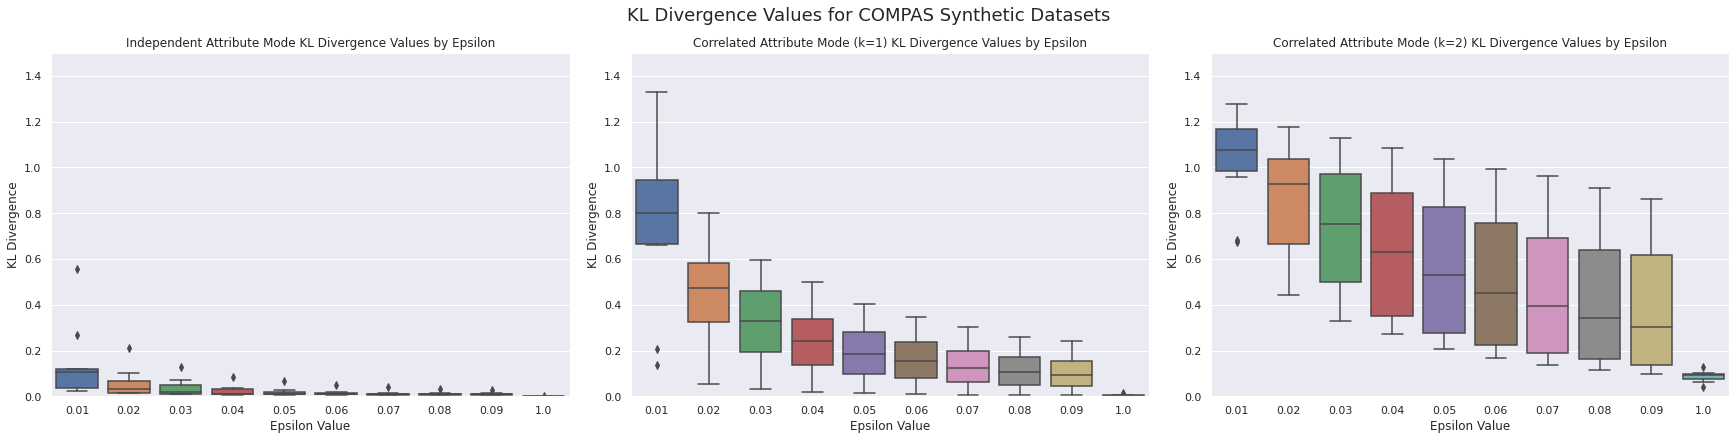

In [ ]:
# Plot KL divergence scores over multiple epsilon values for independent, correlated (k=1), and correlated (k=2) modes
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 6), constrained_layout=True)
fig.suptitle("KL Divergence Values for COMPAS Synthetic Datasets", fontsize=18)

plot_KL_divergence([KL_scores["independent"][eps] for eps in eps_values], eps_values, "Independent Attribute Mode", ax=ax[0])
plot_KL_divergence([KL_scores["correlated_k1"][eps] for eps in eps_values], eps_values, "Correlated Attribute Mode (k=1)", ax=ax[1])
plot_KL_divergence([KL_scores["correlated_k2"][eps] for eps in eps_values], eps_values, "Correlated Attribute Mode (k=2)", ax=ax[2])

- Compute the difference in pairwise mutual information, aggregated (summed up) over all pairs of attributes, for __both hw_compas and hw_fake__. 
Generate plots, one for each data generation method (i.e., one plot for B, one for C, and one for D). 

In [ ]:
# Define function to compute mutual information divergence
def compute_pairwise_mutual_info_div(real_mi_df, synthetic_mi_df):
  """Computes the sum of the absolute value of the difference between real[i, j] and synthetic[i, j] over all pairs i, j where i < j"""
  
  sum = 0
  for j in range(len(real_mi_df.columns)):
    for i in range(j):
      sum += abs(real_mi_df.iloc[i, j] - synthetic_mi_df.iloc[i, j])

  return sum

In [ ]:
# Set epsilon values
eps_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

## Compute mutual information divergence for df_real

# Initialize dictionary to save mutual information sums
real_mi_sums = {"independent": {eps: [] for eps in eps_values}, 
                "correlated_k1": {eps: [] for eps in eps_values}, 
                "correlated_k2": {eps: [] for eps in eps_values}
                }

# Compute pairwise mutual information df for df_real
real_mi = pairwise_attributes_mutual_information(df_real)

for eps in eps_values:
  for seed in seeds:
    # Generate synthetic data in independent attribute mode
    describer.describe_dataset_in_independent_attribute_mode(real_data_file, epsilon=eps, seed=seed)
    describer.save_dataset_description_to_file(compas_description_files['independent mode'])

    generator.generate_dataset_in_independent_mode(n=n, description_file=compas_description_files['independent mode'], seed=seed)
    generator.save_synthetic_data(compas_synthetic_data_files['independent mode'])
    real_independent = pd.read_csv(compas_synthetic_data_files['independent mode'])

    # Compute mutual info sum
    real_ind_mi = pairwise_attributes_mutual_information(real_independent)
    real_mi_sums["independent"][eps].append(compute_pairwise_mutual_info_div(real_mi, real_ind_mi))

    # Generate synthetic data in correlated attribute mode w/ k=1
    describer.describe_dataset_in_correlated_attribute_mode(real_data_file, epsilon=eps, k=1, seed=seed)
    describer.save_dataset_description_to_file(compas_description_files['correlated mode (k=1)'])

    generator.generate_dataset_in_correlated_attribute_mode(n=n, description_file=compas_description_files['correlated mode (k=1)'], seed=seed)
    generator.save_synthetic_data(compas_synthetic_data_files['correlated mode (k=1)'])
    real_corr_k1 = pd.read_csv(compas_synthetic_data_files['correlated mode (k=1)'])

    # Compute mutual info sum
    real_corr_k1_mi = pairwise_attributes_mutual_information(real_corr_k1)
    real_mi_sums["correlated_k1"][eps].append(compute_pairwise_mutual_info_div(real_mi, real_corr_k1_mi))

    # Generate synthetic data in correlated attribute mode w/ k=2
    describer.describe_dataset_in_correlated_attribute_mode(real_data_file, epsilon=eps, k=2, seed=seed)
    describer.save_dataset_description_to_file(compas_description_files['correlated mode (k=2)'])

    generator.generate_dataset_in_correlated_attribute_mode(n=n, description_file=compas_description_files['correlated mode (k=2)'], seed=seed)
    generator.save_synthetic_data(compas_synthetic_data_files['correlated mode (k=2)'])
    real_corr_k2 = pd.read_csv(compas_synthetic_data_files['correlated mode (k=2)'])

    # Compute mutual info sum
    real_corr_k2_mi = pairwise_attributes_mutual_information(real_corr_k2)
    real_mi_sums["correlated_k2"][eps].append(compute_pairwise_mutual_info_div(real_mi, real_corr_k2_mi))

    # Clear output
    clear_output()


## Compute mutual information divergence for df_fake

# Initialize dictionary to save mutual information sums
fake_mi_sums = {"independent": {eps: [] for eps in eps_values}, 
                "correlated_k1": {eps: [] for eps in eps_values}, 
                "correlated_k2": {eps: [] for eps in eps_values}
                }

# Compute pairwise mutual information df for df_fake
fake_mi = pairwise_attributes_mutual_information(df_fake)

for eps in eps_values:
  for seed in seeds:
    # Generate synthetic data in independent attribute mode
    describer.describe_dataset_in_independent_attribute_mode(fake_data_file, epsilon=eps, seed=seed)
    describer.save_dataset_description_to_file(fake_description_files['independent mode'])

    generator.generate_dataset_in_independent_mode(n=n, description_file=fake_description_files['independent mode'], seed=seed)
    generator.save_synthetic_data(fake_synthetic_data_files['independent mode'])
    fake_independent = pd.read_csv(fake_synthetic_data_files['independent mode'])

    # Compute mutual info sum
    fake_ind_mi = pairwise_attributes_mutual_information(fake_independent)
    fake_mi_sums["independent"][eps].append(compute_pairwise_mutual_info_div(fake_mi, fake_ind_mi))

    # Generate synthetic data in correlated attribute mode w/ k=1
    describer.describe_dataset_in_correlated_attribute_mode(fake_data_file, epsilon=eps, k=1, seed=seed)
    describer.save_dataset_description_to_file(fake_description_files['correlated mode (k=1)'])

    generator.generate_dataset_in_correlated_attribute_mode(n=n, description_file=fake_description_files['correlated mode (k=1)'], seed=seed)
    generator.save_synthetic_data(fake_synthetic_data_files['correlated mode (k=1)'])
    fake_corr_k1 = pd.read_csv(fake_synthetic_data_files['correlated mode (k=1)'])

    # Compute mutual info sum
    fake_corr_k1_mi = pairwise_attributes_mutual_information(fake_corr_k1)
    fake_mi_sums["correlated_k1"][eps].append(compute_pairwise_mutual_info_div(fake_mi, fake_corr_k1_mi))

    # Generate synthetic data in correlated attribute mode w/ k=2
    describer.describe_dataset_in_correlated_attribute_mode(fake_data_file, epsilon=eps, k=2, seed=seed)
    describer.save_dataset_description_to_file(fake_description_files['correlated mode (k=2)'])

    generator.generate_dataset_in_correlated_attribute_mode(n=n, description_file=fake_description_files['correlated mode (k=2)'], seed=seed)
    generator.save_synthetic_data(fake_synthetic_data_files['correlated mode (k=2)'])
    fake_corr_k2 = pd.read_csv(fake_synthetic_data_files['correlated mode (k=2)'])

    # Compute mutual info sum
    fake_corr_k2_mi = pairwise_attributes_mutual_information(fake_corr_k2)
    fake_mi_sums["correlated_k2"][eps].append(compute_pairwise_mutual_info_div(fake_mi, fake_corr_k2_mi))

    # Clear output
    clear_output()

In [ ]:
# Define function to plot mututal information divergence boxplots
def plot_mi_div(data, epsilon_values, generation_setting, ax, ymax=1.8):
  """Plot mutual information divergence for given data and epsilon values"""

  sns.boxplot(data=data, ax=ax)
  ax.set_title("{} Mutual Information Divergence by Epsilon".format(generation_setting))
  ax.set_xticklabels(labels=epsilon_values)
  ax.set_xlabel("Epsilon Value")
  ax.set_ylabel("Mutual Information Divergence")
  ax.set_ylim((0, ymax))

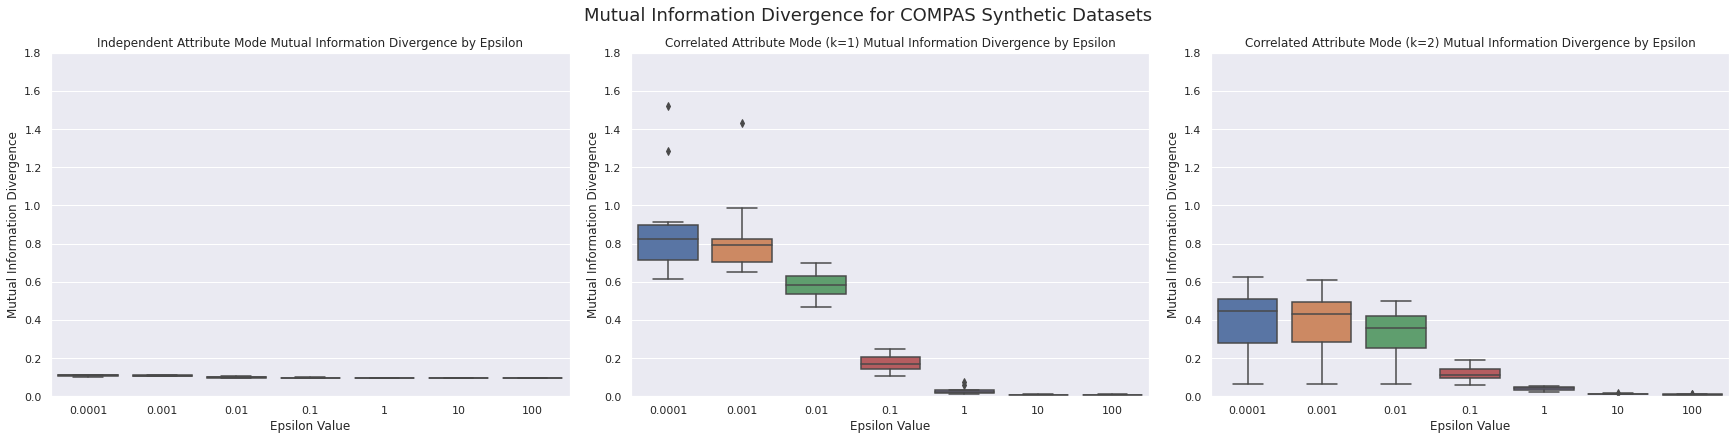

In [ ]:
# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 6), constrained_layout=True)
fig.suptitle("Mutual Information Divergence for COMPAS Synthetic Datasets", fontsize=18)

plot_mi_div([real_mi_sums["independent"][eps] for eps in eps_values], eps_values, "Independent Attribute Mode", ax[0])
plot_mi_div([real_mi_sums["correlated_k1"][eps] for eps in eps_values], eps_values, "Correlated Attribute Mode (k=1)", ax[1])
plot_mi_div([real_mi_sums["correlated_k2"][eps] for eps in eps_values], eps_values, "Correlated Attribute Mode (k=2)", ax[2])

plt.show()

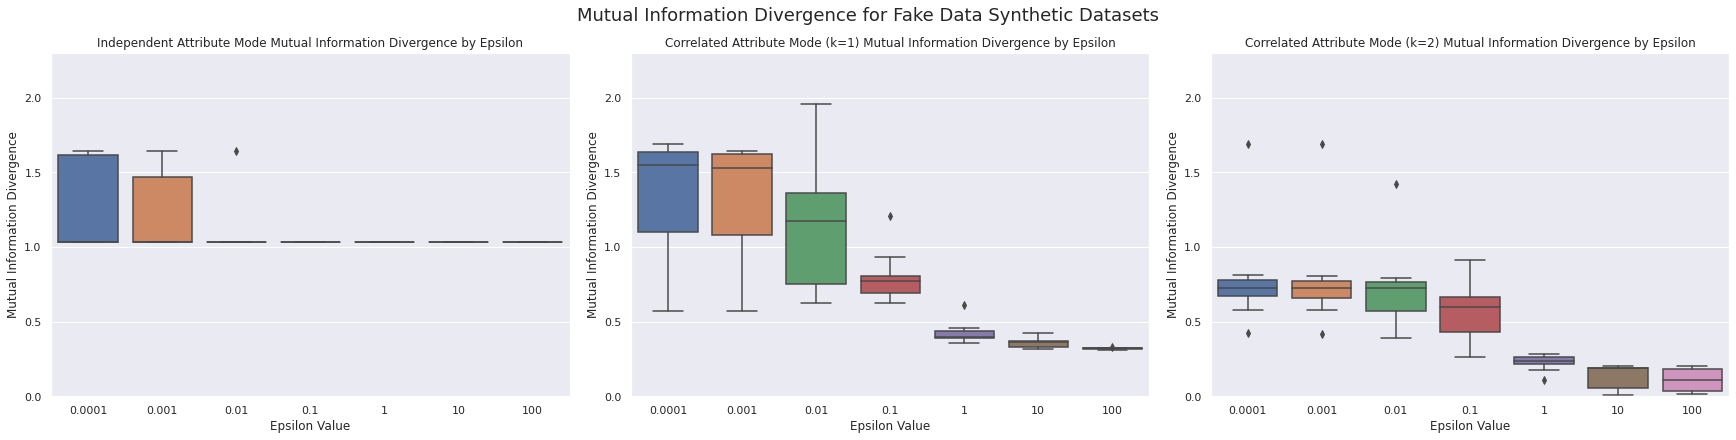

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 6), constrained_layout=True)
fig.suptitle("Mutual Information Divergence for Fake Data Synthetic Datasets", fontsize=18)

plot_mi_div([fake_mi_sums["independent"][eps] for eps in eps_values], eps_values, "Independent Attribute Mode", ax[0], ymax=2.3)
plot_mi_div([fake_mi_sums["correlated_k1"][eps] for eps in eps_values], eps_values, "Correlated Attribute Mode (k=1)", ax[1], ymax=2.3)
plot_mi_div([fake_mi_sums["correlated_k2"][eps] for eps in eps_values], eps_values, "Correlated Attribute Mode (k=2)", ax[2], ymax=2.3)

plt.show()